# Countries Economy, GDP and everything (From Kaggle)

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import locale
import numpy as np

### Importing dataset

In [7]:
df = pd.read_csv('countries-of-the-world.csv', decimal= ',')

df.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

#### Trimming the spaces on variables

In [9]:
df['Country'] = df['Country'].str.strip()
df['Region']  = df['Region'].str.strip()

### Creating a new column for overall GDP

In [10]:
df['GDP'] = df['GDP ($ per capita)'] * df['Population']

### Sorting by GDP per capita

In [12]:
df = df.sort_values('GDP ($ per capita)', ascending= False)

#### Top 10 GDPs Per Capita in the World

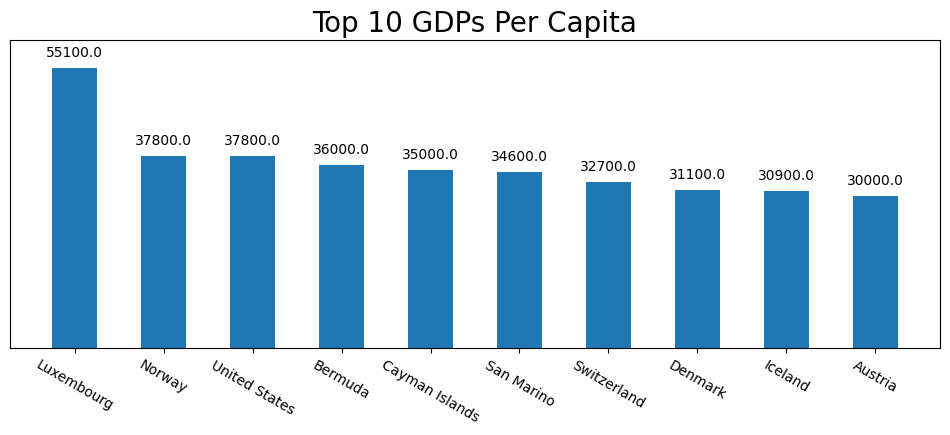

In [25]:
style.use('default')
plt.figure(figsize= (12,4))
plt.title('Top 10 GDPs Per Capita', fontsize = 20)

# Ploting the bar graph
x = df['Country'].head(10)
y = df['GDP ($ per capita)'].head(10)
bars = plt.bar(x, y, width= 0.5)
# Adding labels to the bars
plt.bar_label(bars, y, padding= 6)

#Setting the size of the y axis
plt.ylim(0, max(y) * 1.1)

# Hide the y-axis scale
plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks(rotation=-30)
    
plt.show()

### Sorting by GDP

In [26]:
df = df.sort_values('GDP', ascending= False)

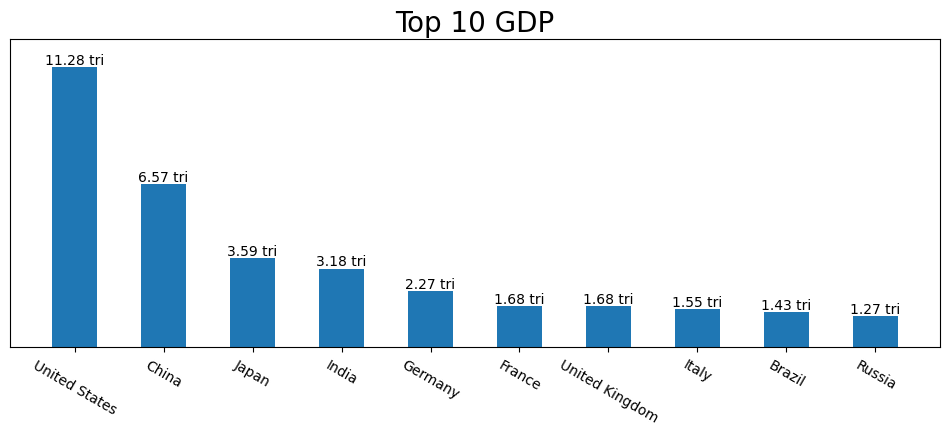

In [27]:
style.use('default')
plt.figure(figsize= (12,4))
plt.title('Top 10 GDP', fontsize = 20)

x = df['Country'].head(10)
y = df['GDP'].head(10)

# Ploting the bar graph
plt.bar(x, y, width= 0.5)

#Setting the size of the y axis
plt.ylim(0, max(y) * 1.1)
# Hide the y-axis scale
plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks(rotation=-30)


# GDP per capita values above each bar
for i, gdp in enumerate(df['GDP'].head(10)):
    # Formatting GDP like billions
    formatted_gdp = locale.format_string('%.2f tri', gdp / 1e12)
    plt.text(i, gdp, str(formatted_gdp), ha='center', va= 'bottom')


plt.show()

### Analyzing the relation between Literacy and GDP Per Capita

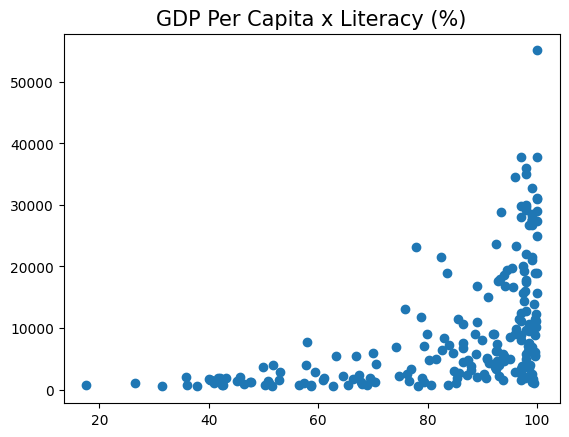

In [28]:
df = df.dropna(subset=['Literacy (%)'])
plt.title('GDP Per Capita x Literacy (%)', fontsize = 15)

x = df['Literacy (%)']
y = df['GDP ($ per capita)']

plt.scatter(x, y)

plt.show()

### Can money buy happiness?

We can take a look at how happy the people from each nation are and if that seems to be correlated to its GDP per capita data

### Importing World Happiness Dataset

In [29]:
wh = pd.read_csv(r"C:\Users\erick\Jupyter\Countries Economics\World Happiness Data\2019.csv")
    
wh.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Merging it with our economy dataframe

In [30]:
    df_merged = pd.merge(df, wh[['Country or region', 'Score']], left_on='Country', right_on='Country or region', how='inner')

    df_merged

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP,Country or region,Score
0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,...,80.65,3.0,14.14,8.26,0.010,0.204,0.787,1.128119e+13,United States,6.892
1,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,...,83.35,1.5,13.25,6.97,0.125,0.473,0.403,6.569869e+12,China,5.191
2,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.4,7.87,0.00,3.26,28200.0,99.0,...,86.85,3.0,9.37,9.16,0.017,0.258,0.725,3.594474e+12,Japan,5.886
3,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,...,42.86,2.5,22.01,8.18,0.186,0.276,0.538,3.176521e+12,India,4.015
4,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,...,65.56,3.0,8.25,10.62,0.009,0.296,0.695,2.274855e+12,Germany,6.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Somalia,SUB-SAHARAN AFRICA,8863338,637657,13.9,0.47,5.37,116.70,500.0,37.8,...,98.29,1.0,45.13,16.63,0.650,0.100,0.250,4.431669e+09,Somalia,4.668
137,Liberia,SUB-SAHARAN AFRICA,3042004,111370,27.3,0.52,0.00,128.87,1000.0,57.5,...,93.77,2.0,44.77,23.10,0.769,0.054,0.177,3.042004e+09,Liberia,3.975
138,Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,83.7,0.56,0.00,143.64,500.0,31.4,...,92.13,2.0,45.76,23.03,0.490,0.310,0.210,3.002625e+09,Sierra Leone,4.374
139,Bhutan,ASIA (EX. NEAR EAST),2279723,47000,48.5,0.00,0.00,100.44,1300.0,42.2,...,96.48,2.0,33.65,12.70,0.258,0.379,0.363,2.963640e+09,Bhutan,5.082


### Analyzing the relationship between Happiness and GDP per capita

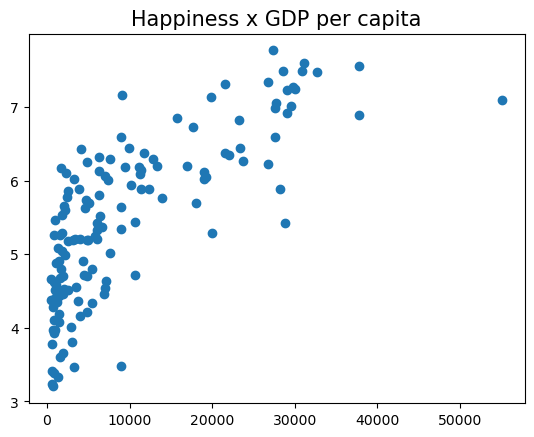

In [91]:
plt.figure(figsize= (10,5))

plt.title('Happiness x GDP per capita', fontsize = 15)

y = df_merged['Score']
x = df_merged['GDP ($ per capita)']

plt.scatter(x, y)

plt.show()

#### Performing Linear Regression (y = a + bx)

In [92]:
from sklearn.linear_model import LinearRegression

y = df_merged['Score']
x = df_merged['GDP ($ per capita)']

reg = LinearRegression().fit(x.values.reshape(-1, 1),y)

y = 4.68 + 7.915442776015031e-05x    R² = 0.57


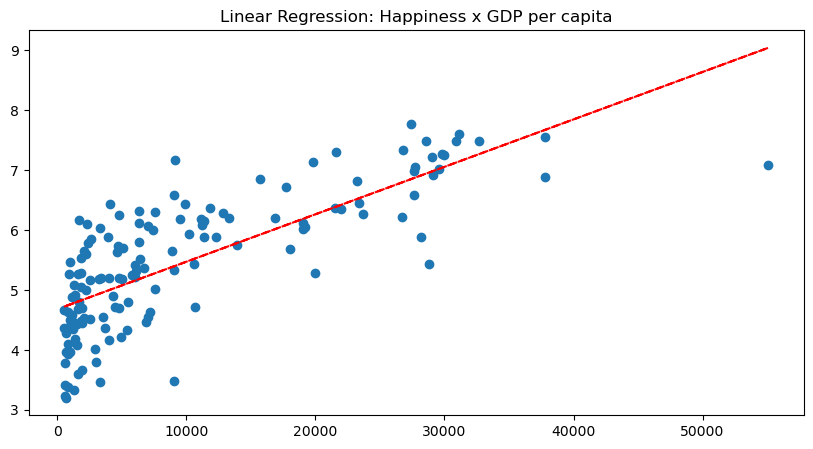

In [93]:
a = reg.intercept_
b = reg.coef_

Y = a + b * x
# Calculating R²
r2 = reg.score(x.values.reshape(-1, 1),y)

plt.figure(figsize= (10,5))
plt.title('Linear Regression: Happiness x GDP per capita', fontsize = 12)

y = df_merged['Score']
x = df_merged['GDP ($ per capita)']

plt.scatter(x, y)
plt.plot(x, Y, '--r')

print(f'y = {round(a, 2)} + {float(b)}x    R² = {round(r2, 2)}')

plt.show()

Visualizing our regression line, we can see the upwards trend. The greater the GDP per capita, the happier the country will. However, our model isn't the most accurate, as we can see by our R² value of 0.57. The closer our R² gets to 1 the better. 

Another clear issue of the model, it's that it implies that happiness can increase above the 10 mark, although the score only goes up to 10

We can also see that the observation with the greater GDP per capita (USA) is far from having the greater happiness score. And its positioning on the graph may suggest that after a certain level of GDP per capita, happiness may actually decrease. That kind of behavior can be translated in quadratic functions. Therefore, it might me interesting to perform a quadratic regression and test if it fits the data better than the linear, and if we get a R² closer to 1.

### Performing a quadratic regression

y = -1.814977783336037e-09 x² + 0.00014231745350089478x + 4.44     R² = 0.62 


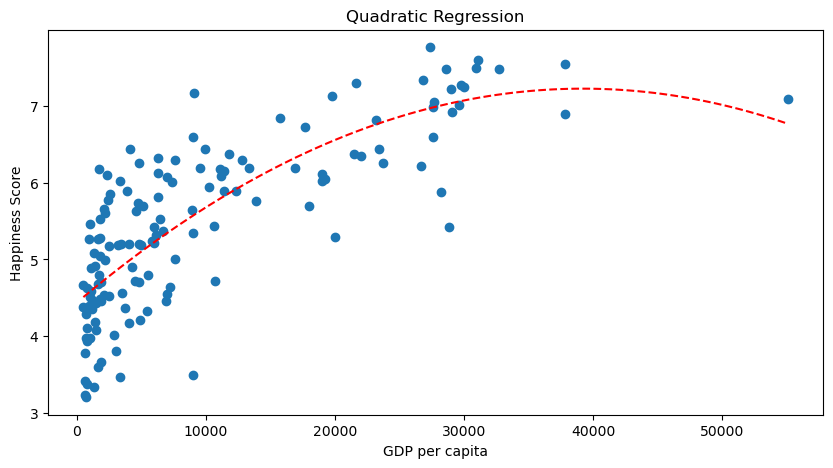

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df_merged['GDP ($ per capita)'].values.reshape(-1, 1) 
y = df_merged['Score']  # Explained variable

# Converting features to polynomies of degree 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Creating and adjusting the regression model
reg = LinearRegression().fit(X_poly, y)

coef = reg.coef_
c = reg.intercept_

# Calcular R²
r2 = reg.score(X_poly,y)

# Printing the regression function
print(f"y = {coef[2]} x² + {coef[1]}x + {round(c,2)}     R² = {round(r2, 2)} ")

# Y = (coef[2] * X ** 2) + (coef[1] * X)+ c

# Gerar valores para a variável explicativa
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Prever os valores correspondentes da variável explicada usando o modelo ajustado
y_pred = reg.predict(poly_features.transform(x_values))

plt.figure(figsize= (10,5))

plt.title("Quadratic Regression")
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')

plt.scatter(X,y)

plt.plot(x_values, y_pred, '--r')

plt.show()

That's it. Now we have an R² that is a lit bit closer to one. But the most important thing is: our regression no longer implies that the happiness score can surpass its own limited scale. 

We can also calculate which would the certain level of GDP per capita that after it, happiness would decrease instead of increasing. That would be the x (GDP per capita) value that gives the maximum value of y (happiness) of the quadratic function we found

In [102]:
max_index = np.argmax(y_pred)

# Assuming x_values is the array of x values used in the regression
x_max = x_values[max_index]

print(f'$ {round(float(x_max))} per capita')

$ 39106 per capita


Therefore, according to our model, after the $ 39106 per capita mark, people are not getting any happier.